# Data exploration and transformation for jobspy query output

In this notebook, the output from Jobspy will be explored and cleaned in a way that will be general for the processing of the data.

## General goal

The general goal of the dashboard is to viasually analyse the status of the job market in a specific (or various) European countries and per industry (or job title). For doing this, an open-source library [(JobSpy)](https://github.com/cullenwatson/JobSpy) is used to scrape data from the most popular job-posting sites, **Indeed** and **Glassdoor**.

THe first step is to check what is the data that is gathered from the query, to select the interesting or most populated features, and to remove duplicates between pages.

In [1]:
from jobspy import scrape_jobs

In [2]:
country = 'Germany'
jobs = scrape_jobs(
    site_name=[
        "indeed",
        "glassdoor"
    ],
    search_term="data science",
    location=country,
    results_wanted=1000,
    hours_old=72,
    country_indeed=country
)

2025-02-17 19:04:17,952 - INFO - JobSpy:Indeed - search page: 1 / 10
2025-02-17 19:04:19,084 - INFO - JobSpy:Indeed - search page: 2 / 9
2025-02-17 19:04:19,608 - INFO - JobSpy:Glassdoor - search page: 1 / 30
2025-02-17 19:04:19,658 - INFO - JobSpy:Indeed - found no jobs on page: 2
2025-02-17 19:04:19,658 - INFO - JobSpy:Indeed - finished scraping
2025-02-17 19:04:22,865 - INFO - JobSpy:Glassdoor - search page: 2 / 30
2025-02-17 19:04:27,837 - INFO - JobSpy:Glassdoor - search page: 3 / 30
2025-02-17 19:04:29,676 - INFO - JobSpy:Glassdoor - search page: 4 / 30
2025-02-17 19:04:30,472 - INFO - JobSpy:Glassdoor - finished scraping


In [3]:
jobs.head(10)

,id,site,job_url,job_url_direct,title,company,location,date_posted,job_type,salary_source,...,emails,description,company_industry,company_url,company_logo,company_url_direct,company_addresses,company_num_employees,company_revenue,company_description
0,gd-1009641213697,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,Promotion Medizininformatik - Machine Learning...,Medizinische Hochschule Brandenburg Campus GmbH,Brandenburg an der Havel,2025-02-17,NaN,NaN,...,NaN,**Wir suchen SIE! Jetzt bewerben und Teil unse...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gd-1009641193978,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,Data Engineer/ Process Mining Consultant*,Cegeka Deutschland GmbH,NaN,2025-02-17,NaN,NaN,...,angela.miletic@cegeka.com,### **Diese Leistungen übernimmst Du**\n\n* De...,NaN,https://www.glassdoor.de/Overview/W-EI_IE11259...,https://media.glassdoor.com/sql/112590/cegeka-...,NaN,NaN,NaN,NaN,NaN
2,gd-1009641064823,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,Space for Early Warnings in Africa - Cloud Eng...,EUMETSAT,Darmstadt,2025-02-17,NaN,direct_data,...,NaN,EUMETSAT is an intergovernmental organisation ...,NaN,https://www.glassdoor.de/Overview/W-EI_IE52673...,https://media.glassdoor.com/sql/526738/eumetsa...,NaN,NaN,NaN,NaN,NaN
3,gd-1009640301948,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,(Principal) Data Scientist,Gemma Analytics,Berlin,2025-02-17,NaN,NaN,...,NaN,**We are Gemma Analytics:** a Berlin\-based co...,NaN,https://www.glassdoor.de/Overview/W-EI_IE74507...,https://media.glassdoor.com/sql/7450762/gemma-...,NaN,NaN,NaN,NaN,NaN
4,gd-1009641223710,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,Team Lead SAP Data Science (all genders),consolut international ag,Deutschland,2025-02-17,NaN,NaN,...,career@consolut.com,Team Lead SAP Data Science – is that you?\n\n\...,NaN,https://www.glassdoor.de/Overview/W-EI_IE66401...,https://media.glassdoor.com/sql/6640139/consol...,NaN,NaN,NaN,NaN,NaN
5,gd-1009641107621,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,Data Analyst with ML Experience (w/m/d),Billie,Berlin,2025-02-17,NaN,NaN,...,NaN,"We are Billie, the leading provider of Buy Now...",NaN,https://www.glassdoor.de/Overview/W-EI_IE36001...,https://media.glassdoor.com/sql/3600131/billie...,NaN,NaN,NaN,NaN,NaN
6,gd-1009641063140,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,Praktikum: Data Science Engineer for AI-driven...,etalytics GmbH,Darmstadt,2025-02-17,NaN,NaN,...,NaN,"Du möchtest nicht nur zuschauen, sondern mit d...",NaN,https://www.glassdoor.de/Overview/W-EI_IE60670...,https://media.glassdoor.com/sql/6067080/etalyt...,NaN,NaN,NaN,NaN,NaN
7,gd-1009641027789,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,Data Engineer Intern,Cyntegrity Germany GmbH,Deutschland,2025-02-17,NaN,NaN,...,NaN,"Join Cyntegrity as an intern, one of the leadi...",NaN,https://www.glassdoor.de/Overview/W-EI_IE23969...,https://media.glassdoor.com/sql/2396996/cynteg...,NaN,NaN,NaN,NaN,NaN
8,gd-1009640816236,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,Duales Studium Wirtschaftsinformatik - Sales &...,Europa-Park GmbH & Co Mack KG,Rust,2025-02-17,NaN,NaN,...,ausbildung@europapark.de,Arbeiten im Europa\-Park Erlebnis\-Resort – Da...,NaN,https://www.glassdoor.de/Overview/W-EI_IE93193...,https://media.glassdoor.com/sql/931937/europa-...,NaN,NaN,NaN,NaN,NaN
9,gd-1009641202859,glassdoor,https://www.glassdoor.de/job-listing/j?jl=1009...,NaN,SAP Analytics In-House Consultant,GetYourGuide,Berlin,2025-02-17,NaN,NaN,...,"jobs@getyourguide.com, jobs@getyourguide.com",### **About GetYourGuide**\n\n\n\nGetYourGuide...,NaN,https://www.glassdoor.de/Overview/W-EI_IE69523...,https://media.glassdoor.com/sql/695237/getyour...,NaN,NaN,NaN,NaN,NaN


In [4]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     164 non-null    object 
 1   site                   164 non-null    object 
 2   job_url                164 non-null    object 
 3   job_url_direct         88 non-null     object 
 4   title                  164 non-null    object 
 5   company                162 non-null    object 
 6   location               159 non-null    object 
 7   date_posted            164 non-null    object 
 8   job_type               67 non-null     object 
 9   salary_source          5 non-null      object 
 10  interval               5 non-null      object 
 11  min_amount             5 non-null      float64
 12  max_amount             5 non-null      float64
 13  currency               5 non-null      object 
 14  is_remote              164 non-null    bool   
 15  job_le

We are interested in checking and analysing the description, among others. Therefore, empty descriptions should be removed:

In [5]:
empty_des = jobs.loc[jobs.description.isna()].index
jobs.drop(empty_des, axis=0, inplace=True)

In [6]:
# Select columns with non-null values and drop the ones not having full rows
cols = ['id','site', 'title', 'company', 'location', 'date_posted', 'job_url', 'description']
jobs_red = jobs[cols].dropna().reset_index(drop=True)

In [7]:
jobs_red

,id,site,title,company,location,date_posted,job_url,description
0,gd-1009641213697,glassdoor,Promotion Medizininformatik - Machine Learning...,Medizinische Hochschule Brandenburg Campus GmbH,Brandenburg an der Havel,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,**Wir suchen SIE! Jetzt bewerben und Teil unse...
1,gd-1009641064823,glassdoor,Space for Early Warnings in Africa - Cloud Eng...,EUMETSAT,Darmstadt,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,EUMETSAT is an intergovernmental organisation ...
2,gd-1009640301948,glassdoor,(Principal) Data Scientist,Gemma Analytics,Berlin,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,**We are Gemma Analytics:** a Berlin\-based co...
3,gd-1009641223710,glassdoor,Team Lead SAP Data Science (all genders),consolut international ag,Deutschland,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,Team Lead SAP Data Science – is that you?\n\n\...
4,gd-1009641107621,glassdoor,Data Analyst with ML Experience (w/m/d),Billie,Berlin,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,"We are Billie, the leading provider of Buy Now..."
...,...,...,...,...,...,...,...,...
152,in-fa946e24d8412885,indeed,Software ABAP Entwickler / Technischer Berater...,Huf Hülsbeck & Fürst GmbH & Co. KG,"Velbert, NW, DE",2025-02-07,https://de.indeed.com/viewjob?jk=fa946e24d8412885,**We are a leading developer and manufacturer ...
153,in-46ce7a1249dad20e,indeed,Data Engineer Intern,Cyntegrity Germany GmbH,DE,2025-02-06,https://de.indeed.com/viewjob?jk=46ce7a1249dad20e,"Join Cyntegrity as an intern, one of the leadi..."
154,in-da33b8db9a993088,indeed,Data Science Intern,Cyntegrity Germany GmbH,DE,2025-01-16,https://de.indeed.com/viewjob?jk=da33b8db9a993088,"Join Cyntegrity as an intern, one of the leadi..."
155,in-3582fa57e8148cac,indeed,Team Leader (m/f/d) Network & Security Services,Hager Group,"Blieskastel, SL, DE",2024-12-13,https://de.indeed.com/viewjob?jk=3582fa57e8148cac,**Why join the** **Digital \& Information** **...


In [8]:
jobs_red.groupby('site').count()

,id,title,company,location,date_posted,job_url,description
site,,,,,,,
glassdoor,71,71,71,71,71,71,71
indeed,86,86,86,86,86,86,86


In [9]:
duplicates = jobs_red[['company', 'title']].duplicated()
dup_df = jobs_red.loc[duplicates]
dup_df.groupby('site').count()

,id,title,company,location,date_posted,job_url,description
site,,,,,,,
indeed,58,58,58,58,58,58,58


In [10]:
remove_index = []
for index, row in dup_df.iterrows():
    temp_dup = jobs_red.loc[(jobs_red.company==row['company']) & (jobs_red.title==row['title'])]
    # If there are duplicates between sites, remove glassdoor:
    if (('indeed' in temp_dup['site'].unique()) & ('glassdoor' in temp_dup['site'].unique())):
        remove_index.append(temp_dup.loc[temp_dup['site']=='glassdoor'].index.item())
print(remove_index)

[3, 8, 25, 30, 23, 4, 26, 20, 17, 5, 15, 32, 28, 16, 12, 19, 7, 22, 26, 34, 2, 2, 33, 27, 64, 69, 66, 51, 53, 67, 50, 51, 67, 56, 55, 45, 44, 62, 68, 49, 46, 43, 58, 65, 61, 14, 38, 6, 13, 29]


In [11]:
jobs_red.iloc[remove_index]

,id,site,title,company,location,date_posted,job_url,description
3,gd-1009641223710,glassdoor,Team Lead SAP Data Science (all genders),consolut international ag,Deutschland,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,Team Lead SAP Data Science – is that you?\n\n\...
8,gd-1009641202859,glassdoor,SAP Analytics In-House Consultant,GetYourGuide,Berlin,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,### **About GetYourGuide**\n\n\n\nGetYourGuide...
25,gd-1009641159894,glassdoor,Working Student Digital Transformation (w/m/d),Uniper,Düsseldorf,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,Our Digital Transformation Team is looking for...
30,gd-1009641140970,glassdoor,Praktikum/Berufspraktische Phase (BPP) im Bere...,Stadtwerke Giessen AG,Gießen,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,Wir bieten angehenden Akademikerinnen und Akad...
23,gd-1009641126852,glassdoor,Realtime Embedded Software Developer (f/m/d),HENSOLDT,Aalen,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,Company\nHENSOLDT Optronics GmbH\nFull time / ...
4,gd-1009641107621,glassdoor,Data Analyst with ML Experience (w/m/d),Billie,Berlin,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,"We are Billie, the leading provider of Buy Now..."
26,gd-1009641105774,glassdoor,Junior Softwareentwickler*in (m/w/d) Erforschu...,ITS Informationstechnik Service GmbH,Dortmund,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,#### **Bei uns steht der Mensch im Mittelpunkt...
20,gd-1009641101455,glassdoor,SAP Developer (m/w/d),shyftplan,Deutschland,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,#### **Deine Spielwiese**\n\n\nAs an SAP Devel...
17,gd-1009641084657,glassdoor,"Data Scientist - (Logistics, Choice)",Delivery Hero,Berlin,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,**Company Description** \n\nAs the world’s pi...
5,gd-1009641063140,glassdoor,Praktikum: Data Science Engineer for AI-driven...,etalytics GmbH,Darmstadt,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,"Du möchtest nicht nur zuschauen, sondern mit d..."


In [12]:
final_jobs = jobs_red.drop(remove_index, axis=0)

In [13]:
final_jobs

,id,site,title,company,location,date_posted,job_url,description
0,gd-1009641213697,glassdoor,Promotion Medizininformatik - Machine Learning...,Medizinische Hochschule Brandenburg Campus GmbH,Brandenburg an der Havel,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,**Wir suchen SIE! Jetzt bewerben und Teil unse...
1,gd-1009641064823,glassdoor,Space for Early Warnings in Africa - Cloud Eng...,EUMETSAT,Darmstadt,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,EUMETSAT is an intergovernmental organisation ...
9,gd-1009351780868,glassdoor,Junior Softwareentwickler*in (m/w/d) Erforschu...,ITS Gruppe,Dortmund,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,##### **Bei uns steht der Mensch im Mittelpunk...
10,gd-1009640928560,glassdoor,Internship – IT-Infrastructure (all genders) –...,MBition GmbH,Berlin,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,"Your Mission\n\n\n\nJoin MBition, a 100% subsi..."
11,gd-1009641032280,glassdoor,Solution Engineering & Data Science Intern (m/...,Bliro GmbH,München,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,You want to...\n\n* join a scaling Start\-Up i...
...,...,...,...,...,...,...,...,...
152,in-fa946e24d8412885,indeed,Software ABAP Entwickler / Technischer Berater...,Huf Hülsbeck & Fürst GmbH & Co. KG,"Velbert, NW, DE",2025-02-07,https://de.indeed.com/viewjob?jk=fa946e24d8412885,**We are a leading developer and manufacturer ...
153,in-46ce7a1249dad20e,indeed,Data Engineer Intern,Cyntegrity Germany GmbH,DE,2025-02-06,https://de.indeed.com/viewjob?jk=46ce7a1249dad20e,"Join Cyntegrity as an intern, one of the leadi..."
154,in-da33b8db9a993088,indeed,Data Science Intern,Cyntegrity Germany GmbH,DE,2025-01-16,https://de.indeed.com/viewjob?jk=da33b8db9a993088,"Join Cyntegrity as an intern, one of the leadi..."
155,in-3582fa57e8148cac,indeed,Team Leader (m/f/d) Network & Security Services,Hager Group,"Blieskastel, SL, DE",2024-12-13,https://de.indeed.com/viewjob?jk=3582fa57e8148cac,**Why join the** **Digital \& Information** **...


Location in glassdoor contains city, region and country code. Let's divide this in city and country (coming from selected query in jobspy)

In [14]:
final_jobs['city'] = final_jobs['location'].str.split(',').str[0]
final_jobs['country'] = country
final_jobs.drop('location', axis=1, inplace=True)

In [15]:
final_jobs.groupby('city').count()

,id,site,title,company,date_posted,job_url,description,country
city,,,,,,,,
Aachen,5,5,5,5,5,5,5,5
Aalen,1,1,1,1,1,1,1,1
Ahrensburg,2,2,2,2,2,2,2,2
Berlin,20,20,20,20,20,20,20,20
Berlin-Friedrichshain,1,1,1,1,1,1,1,1
Berlin-Kreuzberg,1,1,1,1,1,1,1,1
Biberach an der Riß,2,2,2,2,2,2,2,2
Blieskastel,2,2,2,2,2,2,2,2
Bonn,1,1,1,1,1,1,1,1


In [16]:
final_jobs.head()

,id,site,title,company,date_posted,job_url,description,city,country
0,gd-1009641213697,glassdoor,Promotion Medizininformatik - Machine Learning...,Medizinische Hochschule Brandenburg Campus GmbH,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,**Wir suchen SIE! Jetzt bewerben und Teil unse...,Brandenburg an der Havel,Germany
1,gd-1009641064823,glassdoor,Space for Early Warnings in Africa - Cloud Eng...,EUMETSAT,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,EUMETSAT is an intergovernmental organisation ...,Darmstadt,Germany
9,gd-1009351780868,glassdoor,Junior Softwareentwickler*in (m/w/d) Erforschu...,ITS Gruppe,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,##### **Bei uns steht der Mensch im Mittelpunk...,Dortmund,Germany
10,gd-1009640928560,glassdoor,Internship – IT-Infrastructure (all genders) –...,MBition GmbH,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,"Your Mission\n\n\n\nJoin MBition, a 100% subsi...",Berlin,Germany
11,gd-1009641032280,glassdoor,Solution Engineering & Data Science Intern (m/...,Bliro GmbH,2025-02-17,https://www.glassdoor.de/job-listing/j?jl=1009...,You want to...\n\n* join a scaling Start\-Up i...,München,Germany


In [17]:
final_jobs.dtypes

id             object
site           object
title          object
company        object
date_posted    object
job_url        object
description    object
city           object
country        object
dtype: object

In [18]:
print(f"""
    Lengths for setting VARCHAR length in database: \n
    Title:\n {final_jobs.title.str.len().describe()} \n
    Company:\n {final_jobs.company.str.len().describe()} \n
    URL:\n {final_jobs.job_url.str.len().describe()} \n
    Description:\n {final_jobs.description.str.len().describe()} \n
    """)


    Lengths for setting VARCHAR length in database: 

    Title:
 count    111.000000
mean      46.369369
std       21.001267
min       19.000000
25%       33.000000
50%       44.000000
75%       56.000000
max      137.000000
Name: title, dtype: float64 

    Company:
 count    111.000000
mean      15.774775
std       11.926048
min        3.000000
25%        7.500000
50%       11.000000
75%       21.000000
max       61.000000
Name: company, dtype: float64 

    URL:
 count    111.000000
mean      50.351351
std        2.517750
min       49.000000
25%       49.000000
50%       49.000000
75%       49.000000
max       55.000000
Name: job_url, dtype: float64 

    Description:
 count     111.000000
mean     4340.702703
std      1242.268150
min      1681.000000
25%      3464.000000
50%      4408.000000
75%      5166.000000
max      7529.000000
Name: description, dtype: float64 

    


Load data into a sqlite database

In [19]:
import sqlite3

conn = sqlite3.connect("jobs.db")
cursor = conn.cursor()
# Create jobs table
cursor.execute("""
    CREATE TABLE IF NOT EXISTS jobspy (
        id TEXT PRIMARY KEY,
        title TEXT,
        company TEXT,
        date_posted TEXT
        job_url TEXT
        description TEXT
        city TEXT
        country TEXT
    )
""")
conn.commit()

In [20]:
final_jobs.to_sql(
    "jobspy",
    conn,
    if_exists='append',
    index=False,
)

111

In [21]:
%load_ext sql
%sql sqlite:///jobs.db
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

In [22]:
%sql SELECT * FROM jobspy;

 * sqlite:///jobs.db
Done.


[('gd-1009641064823', 'glassdoor', 'Space for Early Warnings in Africa - Cloud Engineer', 'EUMETSAT', '2025-02-17', 'https://www.glassdoor.de/job-listing/j?jl=1009641064823', "EUMETSAT is an intergovernmental organisation based in Darmstadt, Germany. Our vision is to be the leading user\\-driven operational agency in Europe ... (6653 characters truncated) ... ain, Sweden, Switzerland, Turkey and the United Kingdom).** \n\nJob Type: Full\\-time\n\nPay: Up to 7\\.500,00€ per month\n\nWork Location: In person", 'Darmstadt', 'Germany'),
 ('gd-1009351780868', 'glassdoor', 'Junior Softwareentwickler*in (m/w/d) Erforschung KI-Anwendungen', 'ITS Gruppe', '2025-02-17', 'https://www.glassdoor.de/job-listing/j?jl=1009351780868', "##### **Bei uns steht der Mensch im Mittelpunkt.**\n\n\nWir glauben fest daran, dass Vielfalt die Grundlage für Innovation und Erfolg ist. Deshalb fö ... (4320 characters truncated) ... n digital am Laufen zu halten.\n\n  \n\nBereit, mit uns gemeinsam Großes zu erreichen? Wir freuen uns darauf, mit Dir die nächsten Erfolge zu feiern!", 'Dortmund', 'Germany'),
 ('gd-1009640928560', 'glassdoor', 'Internship – IT-Infrastructure (all genders) – in Berlin', 'MBition GmbH', '2025-02-17', 'https://www.glassdoor.de/job-listing/j?jl=1009640928560', 'Your Mission\n\n\n\nJoin MBition, a 100% subsidiary of Mercedes\\-Benz, and become an integral part of our IT Infrastructure team, driving impactful  ... (2570 characters truncated) ... eople with health impairments to apply to our jobs! Our building and workplaces offer the possibilities to adjust to different employee requirements.', 'Berlin', 'Germany'),
 ('gd-1009641032280', 'glassdoor', 'Solution Engineering & Data Science Intern (m/f/d)', 'Bliro GmbH', '2025-02-17', 'https://www.glassdoor.de/job-listing/j?jl=1009641032280', 'You want to...\n\n* join a scaling Start\\-Up in the heart of Europe?\n* create a category\\-defining company?\n* build something people really want? ... (3143 characters truncated) ... portunity to shape a fast\\-growing, innovative SaaS company.\n* A collaborative, remote\\-first culture with plenty of room for professional growth.', 'München', 'Germany'),
 ('gd-1009641087661', 'glassdoor', 'Sales Analyst Schwerpunkt Pricing (m/f/d)', 'VITAFY BRANDS', '2025-02-17', 'https://www.glassdoor.de/job-listing/j?jl=1009641087661', '**Über uns:**  \n\nWir sind ein langjährig etablierter und weiterwachsender europäischer Multi\\-Channel Player im dynamischen Markt für Consumer Hea ... (4290 characters truncated) ... Team People \\& Organisation freut sich auf Deine Bewerbung! Bewerbungen bitte inklusive Gehaltsvorstellung sowie Deinem frühestmöglichen Startdatum.', 'München', 'Germany'),
 ('gd-1009641056096', 'glassdoor', 'Technical Project Manager (m/f/d)', 'Ververica GmbH', '2025-02-17', 'https://www.glassdoor.de/job-listing/j?jl=1009641056096', "**About Ververica**\n\n\nVerverica, founded by the original creators of Apache Flink™, empowers businesses to unlock the full potential of real\\-tim ... (4282 characters truncated) ... assionate about streaming data, and software development and want to make a significant impact at a leading tech company, we'd love to hear from you.", 'Frankfurt am Main', 'Germany'),
 ('gd-1009641109570', 'glassdoor', 'AI Data Engineer / AI Data Scientist (m/w/d)', 'VisiConsult X-ray Systems & Solutions GmbH', '2025-02-17', 'https://www.glassdoor.de/job-listing/j?jl=1009641109570', '#### **Was Sie erwartet**\n\n\nDie **VisiConsult X\\-ray Systems \\& Solutions GmbH** in Stockelsdorf sucht ab sofort einen engagierten **AI Data Eng ... (4152 characters truncated) ...  neben Neugier und Mut wichtige Punkte in unserem Arbeitsalltag, um mit Leidenschaft innovative Lösungen für einen langfristigen Erfolg zu gestalten.', 'Stockelsdorf', 'Germany'),
 ('gd-1009641008394', 'glassdoor', 'PhD Candidate (m/f/d): Mass Spectrometry Imaging', 'Leibniz-Institut für Analytische Wissenschaften - ISAS - e.V.', '2025-02-17', 'https://www.glassdoor.d

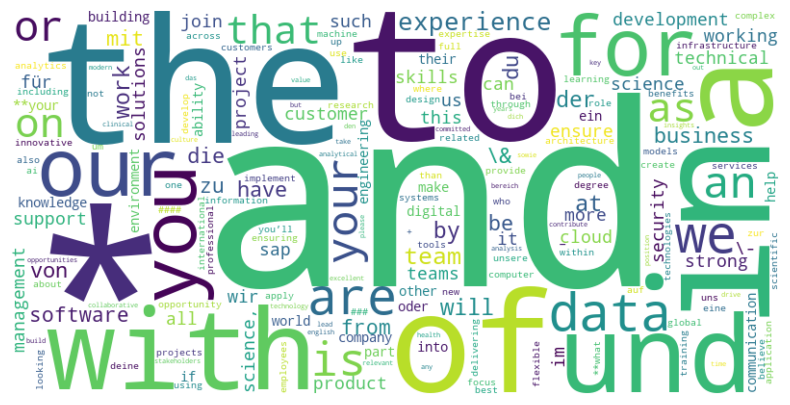

In [25]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Fetch all job descriptions
df = pd.read_sql_query("SELECT * FROM jobspy", conn)

# Count words in all descriptions
all_text = " ".join(df["description"]).lower().split()
word_freq = Counter(all_text)

# Convert to DataFrame for easy plotting
word_freq_df = pd.DataFrame(word_freq.items(), columns=["Word", "Count"])
word_freq_df = word_freq_df.sort_values(by="Count", ascending=False)

# Plot word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Wordcount and various data extraction from job description

Now we have the cleaned dataframe for the output query. This would be the transformation stage that happens BEFORE visualization? The questions that the dashboard should answer are the following:

* How often are different cloud technologies mentioned in the job descriptions? (FuzzyWuzzy, AWS, GCP, AZURE)
* Programming languages?
* Is experience mentioned?
* How similar are the ads between them?
* Word frequency in job title?